# 📦 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 📂 Load Data

In [2]:
sierraleone_df = pd.read_csv('../data/raw/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])

# 🧭 Overview

In [3]:

print("🔹 Data Shape:", sierraleone_df.shape)
print("🔹 Columns:", sierraleone_df.columns.tolist())
display(sierraleone_df.head())

🔹 Data Shape: (525600, 19)
🔹 Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# 📊 Summary Statistics

In [4]:

display(sierraleone_df.describe())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


# 🧼 Missing Values

In [5]:

missing = sierraleone_df.isna().sum()
missing_percent = sierraleone_df.isna().mean() * 100
print("Missing Value Summary:")
print(missing[missing > 0])
print("\n❗Columns with >5% missing:")
print(missing_percent[missing_percent > 5])

Missing Value Summary:
Comments    525600
dtype: int64

❗Columns with >5% missing:
Comments    100.0
dtype: float64


# 🚨 Outlier Detection


In [6]:

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = sierraleone_df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"⚠️ Outlier rows count: {outliers.sum()}")

⚠️ Outlier rows count: 16292


# 🔧 Cleaning: Fill missing with median

In [7]:

sierraleone_df[columns_to_check] = sierraleone_df[columns_to_check].fillna(sierraleone_df[columns_to_check].median())

# 💾 Save Cleaned Data (excluded from git)

In [8]:

sierraleone_df.to_csv('../data/processed/sierraleone_clean.csv', index=False)

# 🕒 Time Series Analysis

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


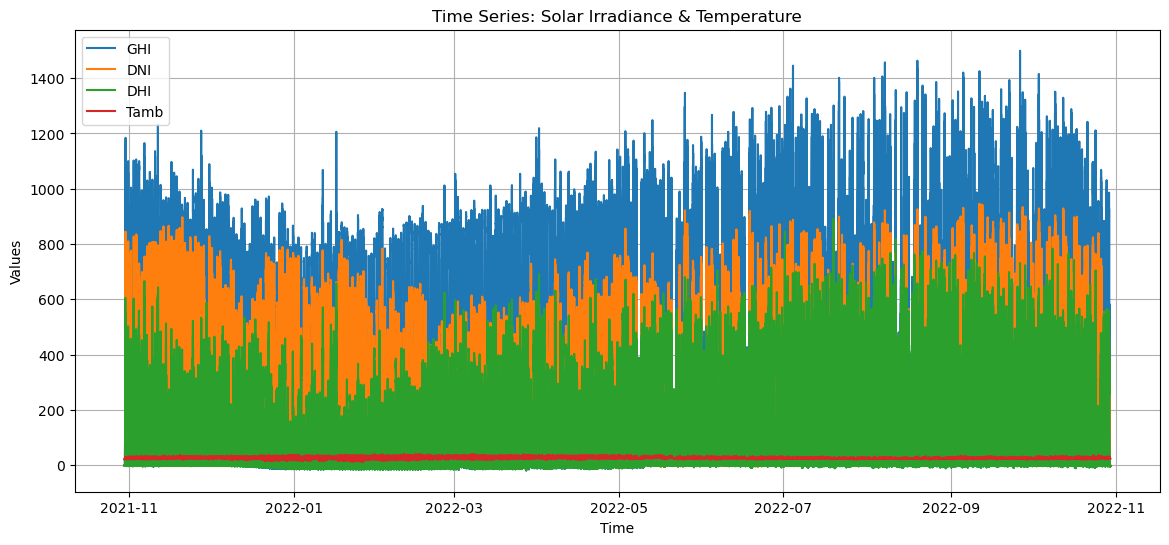

In [9]:
time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.figure(figsize=(14, 6))
for col in time_cols:
    plt.plot(sierraleone_df['Timestamp'], sierraleone_df[col], label=col)
plt.legend()
plt.title('Time Series: Solar Irradiance & Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# 🧽 Cleaning Effect


Text(0, 0.5, 'Average Reading')

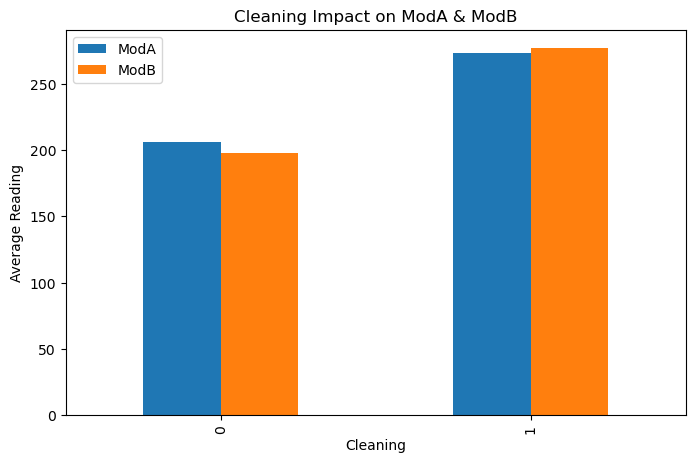

In [10]:
sierraleone_df['Cleaning'] = sierraleone_df['Cleaning'].astype(int)
cleaning_avg = sierraleone_df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_avg.plot(kind='bar', title='Cleaning Impact on ModA & ModB', figsize=(8, 5))
plt.ylabel('Average Reading')

# 🔗 Correlation Heatmap


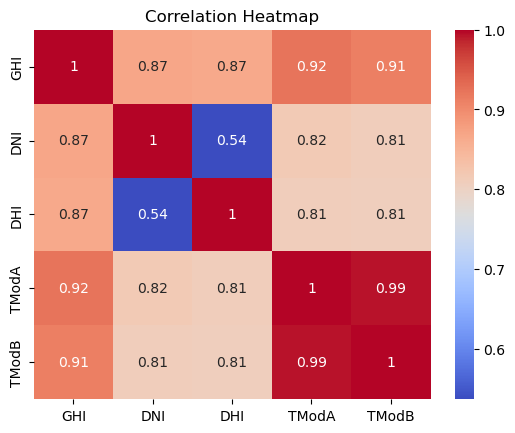

In [11]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(sierraleone_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 🌬️ Wind vs GHI


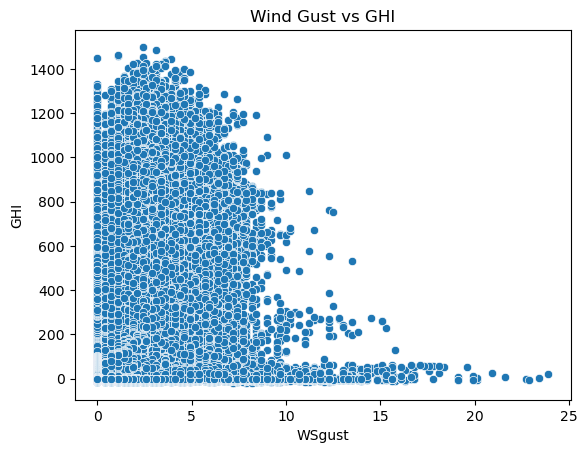

In [12]:
sns.scatterplot(x='WSgust', y='GHI', data=sierraleone_df)
plt.title('Wind Gust vs GHI')
plt.show()

# 💧 Humidity vs Temperature & GHI


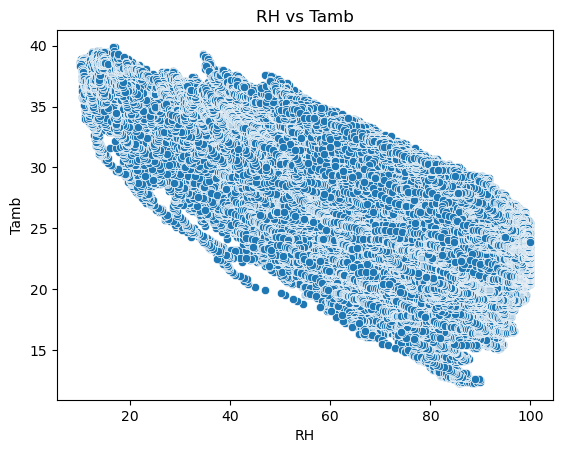

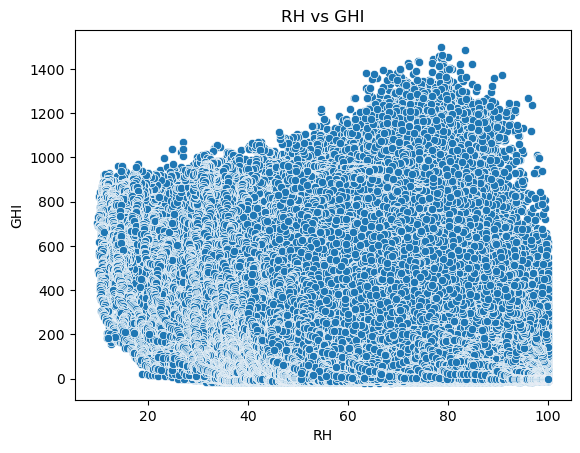

In [13]:
sns.scatterplot(x='RH', y='Tamb', data=sierraleone_df)
plt.title('RH vs Tamb')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=sierraleone_df)
plt.title('RH vs GHI')
plt.show()

# 📊 Histograms

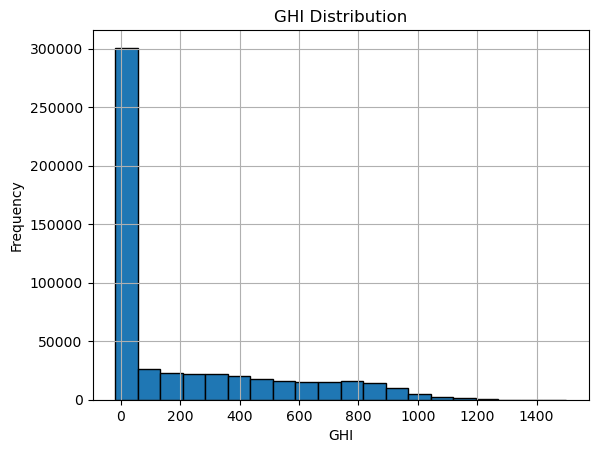

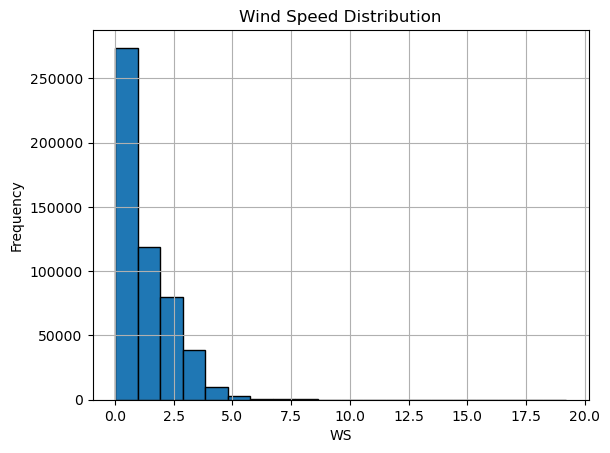

In [14]:

sierraleone_df['GHI'].hist(bins=20, edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

sierraleone_df['WS'].hist(bins=20, edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()

# 🔵 Bubble Chart: GHI vs Tamb

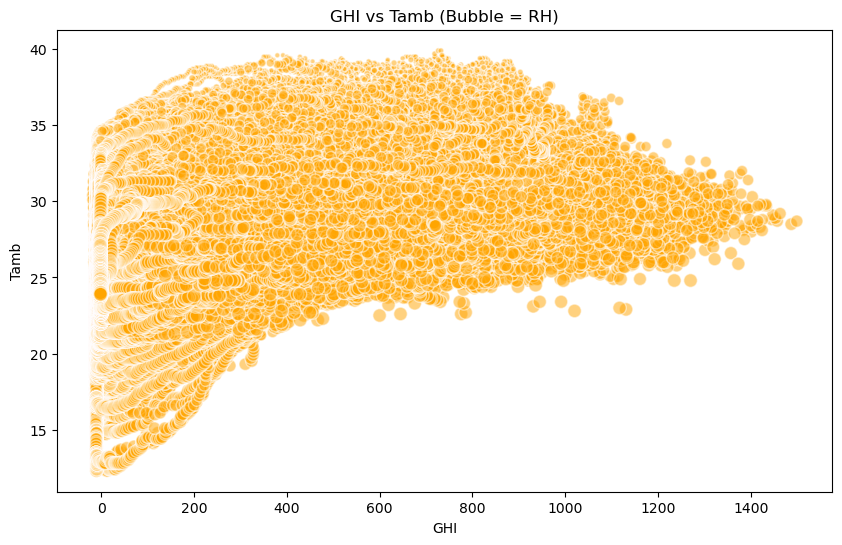

In [15]:

plt.figure(figsize=(10, 6))
plt.scatter(sierraleone_df['GHI'], sierraleone_df['Tamb'], s=sierraleone_df['RH'], alpha=0.5, c='orange', edgecolors='w')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble = RH)')
plt.show()